# Support Vector Regression

### Importing Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [4]:
y = y.reshape(-1, 1)

### Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scale_x = StandardScaler()
scale_y = StandardScaler()

In [7]:
X = scale_x.fit_transform(X)
y = scale_y.fit_transform(y)

### Fitting Support Vector Regressor

In [8]:
from sklearn.svm import SVR

In [9]:
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

/home/praneet/venv/ml_dl/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### Predicting New Result

In [10]:
y_pred = scale_y.inverse_transform(regressor.predict(scale_x.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

### Visualizing SVR Results

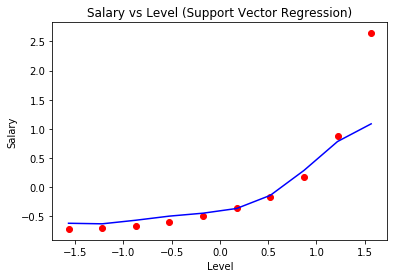

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Salary vs Level (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

### Visualizing SVR Results with Smoother Curve at Higher Dimension

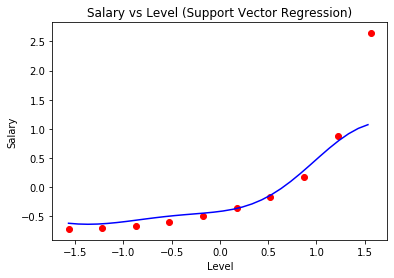

In [20]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Salary vs Level (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()